                                                    *** Progetto UAF ***

# Caricare e visualizzare i dati reali

Questo codice carica un dataset di immagini da una cartella specificata contenente immagini reali, ne conta il numero totale e visualizza un’anteprima di alcune immagini in scala di grigi.

Numero di immagini trovate: 10


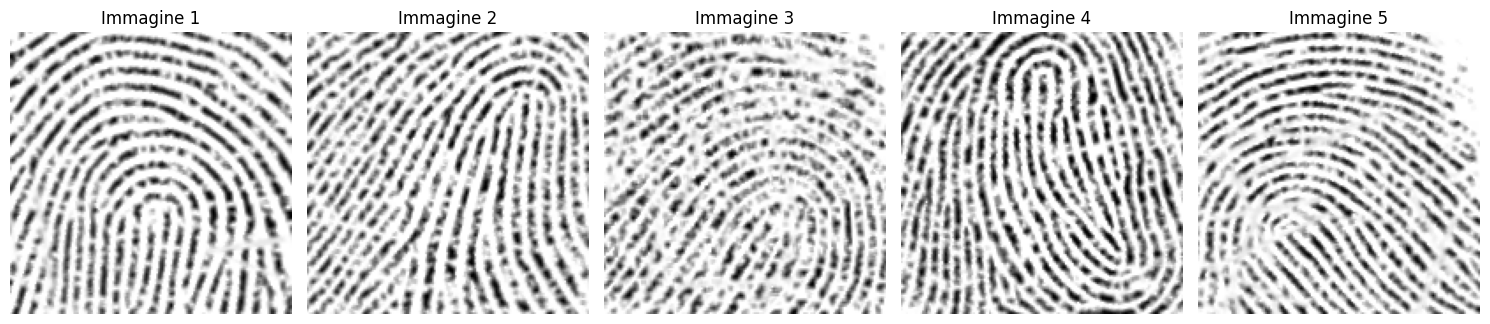

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Definisci il percorso alla cartella real_data
real_data_path = "/Users/giulia/Desktop/UAF_Project_DiMauroIsinelli/dataset_FVC2000_DB4_B/dataset/real_data"

# Recupera tutti i file immagine dalla cartella
image_files = [f for f in os.listdir(real_data_path) if f.endswith(('.bmp', '.png', '.jpg', '.jpeg'))]

# Controlla quante immagini ci sono
print(f"Numero di immagini trovate: {len(image_files)}")

# Mostra alcune immagini di esempio
num_images_to_show = 5  # Numero di immagini da visualizzare
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

for i in range(num_images_to_show):
    # Percorso completo dell'immagine
    img_path = os.path.join(real_data_path, image_files[i])
    
    # Carica l'immagine in scala di grigi
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Visualizza l'immagine
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Immagine {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Pre-processare i dati del training set

Questo codice prepara il dataset di immagini per l’addestramento del modello di deep learning VGG16. In particolare, carica immagini dalla cartella, le pre-processa (conversione in RGB, ridimensionamento, normalizzazione), assegna etichette e le converte in array NumPy. Infine, normalizza ulteriormente le immagini per darle come input del modello.

In [15]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Definisci il percorso della directory
train_data_dir = "/Users/giulia/Desktop/UAF_Project_DiMauroIsinelli/dataset_FVC2000_DB4_B/dataset/train_data"

# Lista per memorizzare le immagini pre-processate
processed_images = []
labels = []  # Qui puoi memorizzare le etichette per il training (ad esempio, 0 per una classe, 1 per un'altra, etc.)

# Funzione per pre-processare un'immagine
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carica immagine in scala di grigi
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Converte l'immagine in 3 canali RGB
    img_resized = cv2.resize(img, (224, 224))  # Ridimensiona a 224x224
    img_normalized = img_resized / 255.0  # Normalizza i pixel tra 0 e 1
    return img_normalized

# Scorri tutte le immagini nella directory train_data
for filename in os.listdir(train_data_dir):
    img_path = os.path.join(train_data_dir, filename)
    
    # Verifica se è un file immagine (ad esempio .bmp, .jpg, .png)
    if filename.endswith(".bmp") or filename.endswith(".jpg") or filename.endswith(".png"):
        
        # Pre-processa l'immagine
        processed_img = preprocess_image(img_path)
        
        # Aggiungi l'immagine alla lista
        processed_images.append(processed_img)
        
        #se l'immagine è in una sottocartella, usa il nome della cartella come etichetta
        label = filename.split('_')[0] 
        labels.append(int(label))

# Converto le liste in array NumPy
processed_images = np.array(processed_images)
labels = np.array(labels)

# Verifica la forma delle immagini e delle etichette
print(f"Forma delle immagini: {processed_images.shape}")
print(f"Forma delle etichette: {labels.shape}")

# Se le immagini sono in scala di grigi, si puo' applicare un'ulteriore normalizzazione per VGG16
processed_images = preprocess_input(processed_images)

# Ora le immagini sono pre-processate e le etichette sono pronte per l'addestramento

Forma delle immagini: (800, 224, 224, 3)
Forma delle etichette: (800,)


# Caricamento e addestramento del modello VGG16

Questo codice definisce un modello di deep learning per il riconoscimento di impronte digitali utilizzando VGG16 come base pre-addestrata su ImageNet. VGG16 viene estesa con layer personalizzati per l’addestramento su un nuovo dataset:
1. Congela i pesi della rete di base (VGG16) per preservare le funzionalità apprese.
2. Aggiunge una global average pooling, un layer denso con dropout e un layer finale per la classificazione.
3. Compila il modello per la classificazione multiclasse, pronto per l’addestramento.

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Carica VGG16 pre-addestrato su ImageNet, senza il classificatore finale (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela i layer di base per non modificarli durante l'addestramento
base_model.trainable = False

# Aggiungi nuovi layer per il riconoscimento delle impronte digitali
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Numero di classi di impronte digitali (modifica a seconda del tuo dataset)
])

# Compila il modello
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostra il riepilogo del modello
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Addestriamo il modello sui dati pre-processati del training set

Questo codice suddivide il dataset in set di training e validazione, addestra il modello di deep learning e analizza le prestazioni. Nello specifico:
1. Suddivisione del dataset: Divide immagini e etichette in un set di training (80%) e validazione (20%).
2. Addestramento del modello: Addestra il modello precedentemente definito per 10 epoche, utilizzando un batch size di 32 e monitorando la perdita e l’accuratezza su training e validazione.
3. Salvataggio del modello: Salva il modello addestrato in un file .h5 per usi futuri.
4. Visualizzazione delle prestazioni: Traccia grafici di perdita e accuratezza per analizzare l’andamento dell’addestramento e validazione nel tempo.

Immagini di training: (640, 224, 224, 3)
Immagini di validazione: (160, 224, 224, 3)
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 164s 8s/step - accuracy: 0.1458 - loss: 2.7253 - val_accuracy: 0.2750 - val_loss: 2.0303
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.2031 - loss: 2.2815 - val_accuracy: 0.3250 - val_loss: 1.8976
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.2683 - loss: 2.0268 - val_accuracy: 0.3750 - val_loss: 1.8773
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.3076 - loss: 1.9405 - val_accuracy: 0.3812 - val_loss: 1.7772
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.3223 - loss: 1.8715 - val_accuracy: 0.3812 - val_loss: 1.7342
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step - accuracy: 0.3220 - loss: 1.8070 - val_accuracy: 0.3875 - val_loss: 1.7199
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 171s 9s/step - accuracy: 0.3495 - loss: 1.7957 - val_accuracy: 0.3938 - val_loss: 1.7067
Epoch 8/10
20/20 ━━━━━━━━━

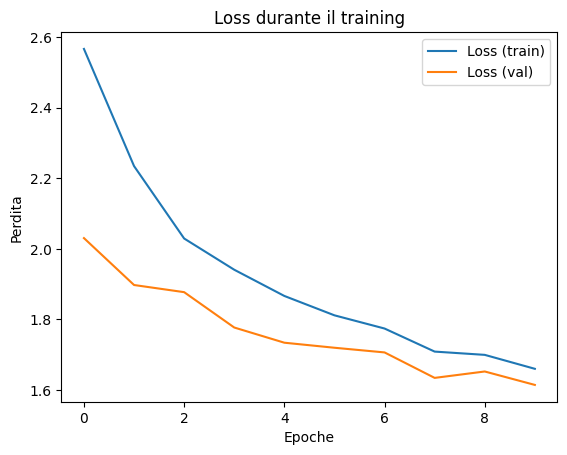

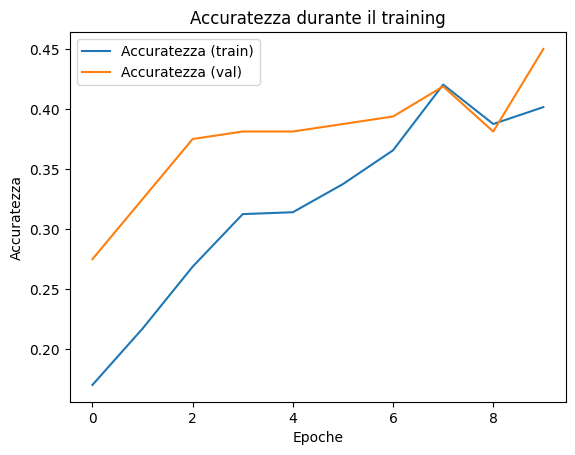

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Suddividi il dataset in training e validazione (80% training, 20% validazione)
X_train, X_val, y_train, y_val = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Verifica la forma delle variabili
print(f"Immagini di training: {X_train.shape}")
print(f"Immagini di validazione: {X_val.shape}")

# Addestramento del modello
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Salva il modello addestrato
model.save("vgg16_fingerprint_model.h5")

# osserviamo accuratezza e perdita durante addestramento
# Plot della perdita
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Perdita')
plt.legend()
plt.show()

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Accuratezza (train)')
plt.plot(history.history['val_accuracy'], label='Accuratezza (val)')
plt.title('Accuratezza durante il training')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()


**Grafico Loss**
La Loss è una metrica che misura quanto il modello è "sbagliato" nelle sue predizioni. Più la perdita è bassa, meglio il modello sta performando.
- Tendenza decrescente: Entrambe le curve (loss sul training set e sul validation set) mostrano una tendenza generale alla diminuzione. Questo è un segnale positivo, indicando che il modello sta imparando a fare predizioni sempre più accurate.

- Divergenza delle curve: A partire da circa la terza epoca, si nota una divergenza tra la perdita sul training set e quella sul validation set. La perdita sul training continua a diminuire costantemente, mentre quella sul validation set raggiunge un minimo e poi inizia a risalire leggermente.

**Grafico Accuracy**
Questo grafico ci dice quanto bene il modello sta imparando a distinguere le diverse classi di impronte digitali man mano che viene esposto a più dati.
- Aumento iniziale dell'accuratezza: Sia l'accuratezza sul set di training che su quello di validation aumenta significativamente nelle prime epoche. Questo è un segnale positivo, indicando che il modello sta imparando le caratteristiche fondamentali delle impronte digitali.

- Divergenza delle curve: A partire da circa la sesta epoca, si nota una divergenza tra l'accuratezza sul training set e quella sul validation set. L'accuratezza sul training continua a crescere, mentre quella sul validation raggiunge un plateau e poi diminuisce leggermente.


## Confusion Matrix

Questo codice valuta il modello di deep learning sulla base del set di validazione:
1. Previsioni: Calcola le probabilità per ciascuna classe sul set di validazione e determina le classi predette.
2. Matrice di confusione: Genera e visualizza la matrice di confusione per analizzare le prestazioni di classificazione per ciascuna classe.
3. Metriche di valutazione: Calcola accuratezza, precisione, recall e F1-score usando un’aggregazione pesata per tenere conto del bilanciamento delle classi.
4. Visualizzazione: Mostra la matrice di confusione in modo intuitivo usando una mappa di colori, utile per identificare errori comuni nel modello.

5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step


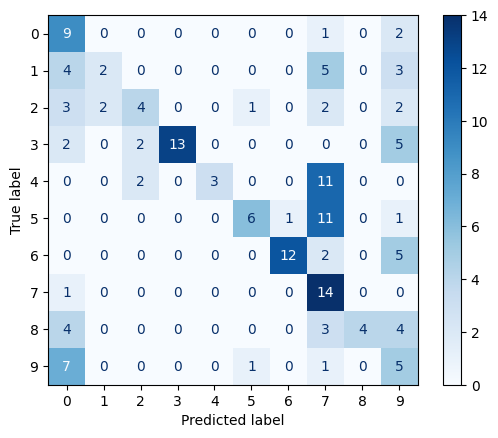

Accuratezza: 45.00%
Precisione: 0.68
Recall: 0.45
F1-Score: 0.46


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Fai le previsioni con il modello
predictions = model.predict(X_val)

# Calcola le classi predette
predicted_classes = np.argmax(predictions, axis=1)

# Calcola la confusion matrix
cm = confusion_matrix(y_val, predicted_classes)

# Visualizza la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # Usa la mappa di colori 'Blues'
plt.show()

# Calcola accuratezza, precisione, recall e F1-score
accuracy = accuracy_score(y_val, predicted_classes)
precision = precision_score(y_val, predicted_classes, average='weighted')
recall = recall_score(y_val, predicted_classes, average='weighted')
f1 = f1_score(y_val, predicted_classes, average='weighted')

print(f"Accuratezza: {accuracy * 100:.2f}%")
print(f"Precisione: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

**Confusion Matrix**
Una matrice di confusione è uno strumento visivo utilizzato nella classificazione statistica per valutare le prestazioni di un modello di classificazione. Ogni riga della matrice rappresenta le istanze di una classe reale, mentre ogni colonna rappresenta le istanze predette come appartenenti a una particolare classe.

- Diagnosi principale: I valori sulla diagonale principale rappresentano le classificazioni corrette. Ad esempio, il valore 13 nella terza riga e terza colonna indica che il modello ha correttamente classificato 13 immagini della classe 3 come 3.
- Errori di classificazione: I valori al di fuori della diagonale principale rappresentano gli errori di classificazione. Ad esempio, il valore 2 nella prima riga e seconda colonna indica che 2 immagini che erano realmente 0 sono state erroneamente classificate come della classe 1.

- Buona performance generale: La maggior parte delle predizioni si trova sulla diagonale principale, suggerendo che il modello sta performando bene nella classificazione della maggior parte delle cifre.
- Errori di classificazione comuni: Sembra esserci una certa confusione tra alcune classi, come 3 e 8, o 7 e 9. Questo potrebbe indicare che queste classi hanno caratteristiche visive simili che il modello fatica a distinguere.
- Classificazioni più difficili: Le classi con un numero minore di classificazioni corrette sulla diagonale principale (ad esempio, 4 e 5) potrebbero essere più difficili da classificare per il modello.

## Curva ROC e AUC

Questo codice calcola e visualizza le curve ROC per un modello di classificazione multiclasse:
1. Previsioni: Utilizza il modello per ottenere le probabilità previste per ciascuna classe.
2. Binarizzazione delle etichette: Converte le etichette in formato binarizzato (one-vs-all) per calcolare curve ROC per ogni classe.
3. Calcolo ROC e AUC: Determina il tasso di veri positivi (TPR) e di falsi positivi (FPR) per ogni classe e calcola l’area sotto la curva (AUC).
4. Visualizzazione: Traccia le curve ROC per ciascuna classe, indicando l’AUC corrispondente e aggiungendo una linea diagonale per rappresentare un classificatore casuale.
5. Analisi: Questo approccio permette di valutare la capacità del modello di distinguere ciascuna classe rispetto alle altre.

5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step


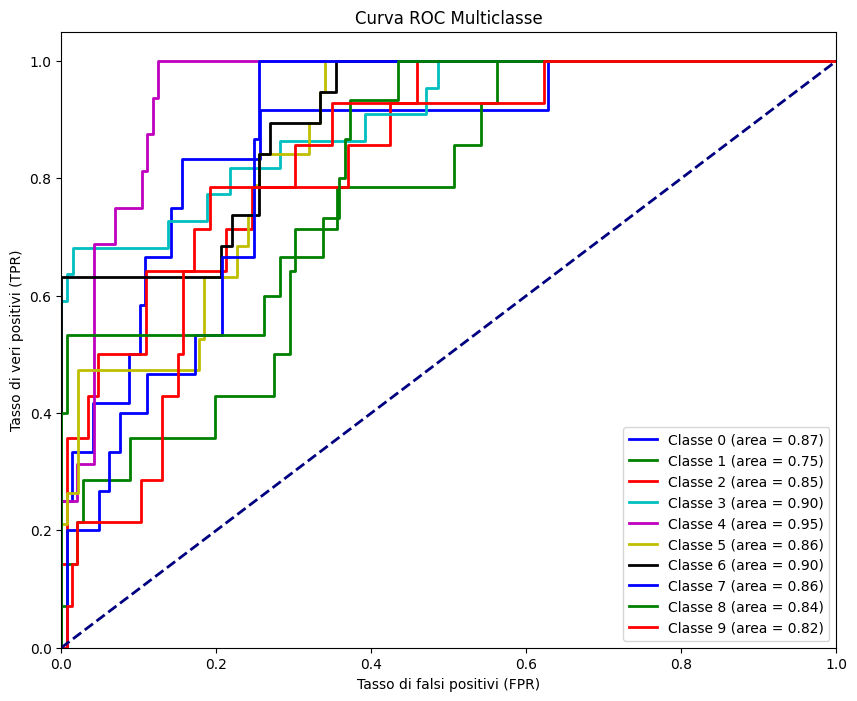

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calcolare le probabilità per ciascuna classe
y_prob = model.predict(X_val)  # Le probabilità per ogni classe

# Binarizzare le etichette per la classificazione multiclasse
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))  # Etichette binarizzate per la multi-classe

# Calcolare la curva ROC per ogni classe
n_classes = y_val_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])  # Calcola ROC per ciascuna classe
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calcola AUC per ciascuna curva ROC

# Visualizzare la curva ROC per tutte le classi
plt.figure(figsize=(10, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Colori per ciascuna classe (adatta se hai più classi)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'Classe {i} (area = {roc_auc[i]:.2f})')

# Plot la linea diagonale
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Aggiungi etichette e legenda
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di falsi positivi (FPR)')
plt.ylabel('Tasso di veri positivi (TPR)')
plt.title('Curva ROC Multiclasse')
plt.legend(loc='lower right')

# Mostra il grafico
plt.show()

**Curva ROC e AUC** 
La Curva ROC (Receiver Operating Characteristic) è un grafico che illustra la performance di un modello di classificazione binaria visualizzando il rapporto tra il tasso di veri positivi (TPR) e il tasso di falsi positivi (FPR) a diversi livelli di soglia di classificazione.

Punti chiave:
* AUC vicino a 1: Indica un modello molto accurato nel distinguere tra le classi positive e negative.
* AUC vicino a 0.5: Indica che il modello è praticamente casuale nel fare le sue predizioni.
* La linea diagonale: Rappresenta un classificatore casuale, dove il TPR è uguale al FPR per qualsiasi valore di soglia.

In questo caso specifico, abbiamo a che fare con una curva ROC multiclasse, dove ogni linea rappresenta la performance di un classificatore binario per una particolare classe rispetto a tutte le altre.


Analizzando le curve:
- Tasso di veri positivi (TPR): Indica la proporzione di esempi positivi correttamente identificati dal modello. Un TPR più alto è migliore.
- Tasso di falsi positivi (FPR): Indica la proporzione di esempi negativi erroneamente identificati come positivi. Un FPR più basso è migliore.
- Area sotto la curva (AUC): L'area sotto ciascuna curva ROC rappresenta la probabilità che un classificatore classifichi un esempio positivo in modo casuale più alto rispetto a un esempio negativo. Un'AUC più vicina a 1 indica un modello migliore.

Dunque:
- Performance delle classi: Le classi con un'AUC più vicina a 1 stanno performando meglio. Ad esempio, la Classe 4 ha l'AUC più alta (0.95), suggerendo che è la classe classificata meglio dal modello.
- Confronto tra le classi: Confrontando le diverse curve, si può vedere che ci sono classi più difficili da classificare (quelle con AUC più basse). Ad esempio, la Classe 9 ha l'AUC più bassa (0.82), indicando che potrebbe essere più difficile da distinguere dalle altre classi.

## Distribuzione predizioni per ogni classe

Questo codice visualizza la distribuzione delle etichette vere e predette per analizzare le prestazioni del modello:
1. Creazione DataFrame: Combina le etichette vere e quelle predette in un DataFrame per facilitarne l’analisi.
2. Grafico a barre: Usa un grafico a barre con Seaborn per mostrare il numero di predizioni corrette e sbagliate per ciascuna classe.
3. Analisi visiva: Aiuta a identificare eventuali squilibri nelle predizioni o classi che il modello fatica a distinguere.

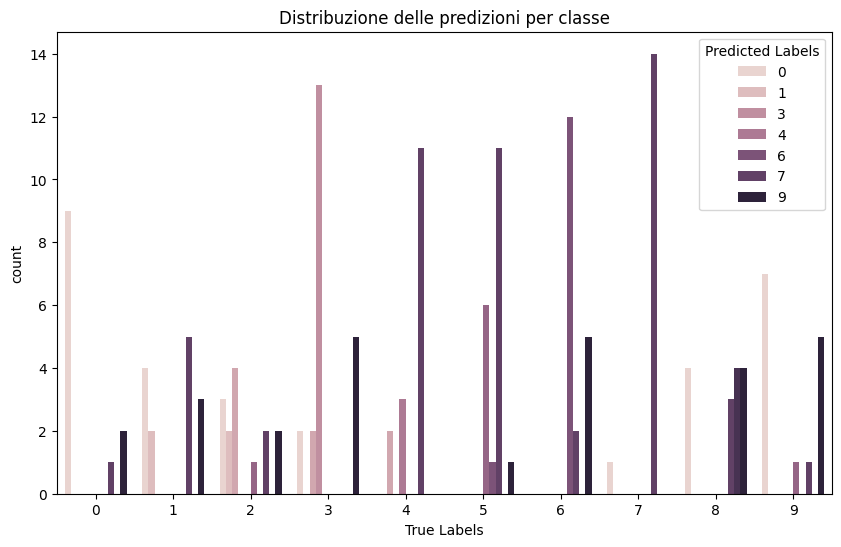

In [16]:
import seaborn as sns
import pandas as pd

# Crea un DataFrame per le etichette vere e predette
df = pd.DataFrame({'True Labels': y_val, 'Predicted Labels': predicted_classes})

# Visualizza un grafico a barre per vedere la distribuzione
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="True Labels", hue="Predicted Labels")
plt.title("Distribuzione delle predizioni per classe")
plt.show()

**Grafico predizione per ogni classe** 
Il grafico rappresentato è un potente strumento utilizzato nell'ambito del machine learning per valutare le performance di un modello di classificazione. In questo caso, il modello è addestrato per classificare dati in 10 classi differenti (da 0 a 9).

- Diagnosi principale: Le barre più alte indicano che il modello sta classificando correttamente molte osservazioni nella loro classe corretta.

- Performance generale: A prima vista, il modello sembra avere una performance ragionevole, con molte classificazioni corrette. Tuttavia, ci sono alcune aree dove il modello commette più errori.

- Errori di classificazione comuni: Alcuni gruppi di classi sembrano essere più frequentemente confusi tra loro. Ad esempio, potrebbe esserci una certa sovrapposizione tra le classi 3 e 5, o tra 7 e 9.

- Classificazioni più difficili: Le classi con barre più basse potrebbero essere più difficili da classificare per il modello.

# Benchmarking

## Carichiamo e addestriamo sul nostro set di dati il modello pre-addestrato ResNet50

Questo codice utilizza ResNet50 per classificare un dataset di immagini. In particolare:
1. Modello base: Carica ResNet50 pre-addestrato su ImageNet, escludendo la testa di classificazione.
2. Aggiunta di layer personalizzati: Aggiunge un livello di pooling globale, un livello denso (1024 unità) con attivazione ReLU, e un livello di output con softmax per la classificazione in 10 classi.
3. Congelamento del modello base: Congela i pesi di ResNet50 per evitare di modificarli durante l’addestramento.
4. Pre-processamento: Prepara le immagini per ResNet50 usando la funzione preprocess_input per adattarle alle aspettative del modello.
5. Etichette one-hot: Converte le etichette in formato one-hot per la classificazione categoriale.
6. Compilazione e addestramento: Compila il modello con l’ottimizzatore Adam e la funzione di perdita categoriale. Addestra per 10 epoche con un batch size di 32, monitorando accuratezza e perdita sul set di validazione.
7. Salvataggio e valutazione: Salva il modello addestrato e valuta le sue prestazioni sui dati di validazione.
8. Visualizzazione delle prestazioni: Traccia grafici di accuratezza e perdita per il training e la validazione per analizzare l’andamento dell’addestramento.

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.0852 - loss: 3.4957 - val_accuracy: 0.1187 - val_loss: 2.6653
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.0945 - loss: 2.6724 - val_accuracy: 0.0875 - val_loss: 2.6024
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.1055 - loss: 2.5773 - val_accuracy: 0.1187 - val_loss: 2.5174
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0866 - loss: 2.4983 - val_accuracy: 0.0750 - val_loss: 2.5576
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.0754 - loss: 2.5555 - val_accuracy: 0.0875 - val_loss: 2.6451
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.1025 - loss: 2.4742 - val_accuracy: 0.1187 - val_loss: 2.6209
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.0768 - loss: 2.5477 - val_accuracy: 0.0938 - val_loss: 2.5035
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.0855 - loss: 2.4687 - val_accuracy: 0.1375 - val_loss:

Test loss: 2.3603999614715576
Test accuracy: 0.14374999701976776


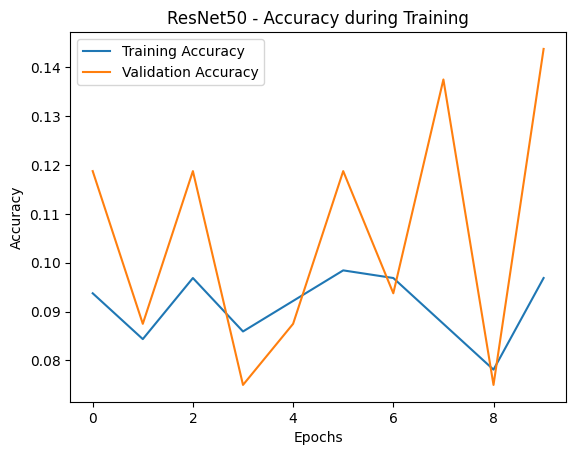

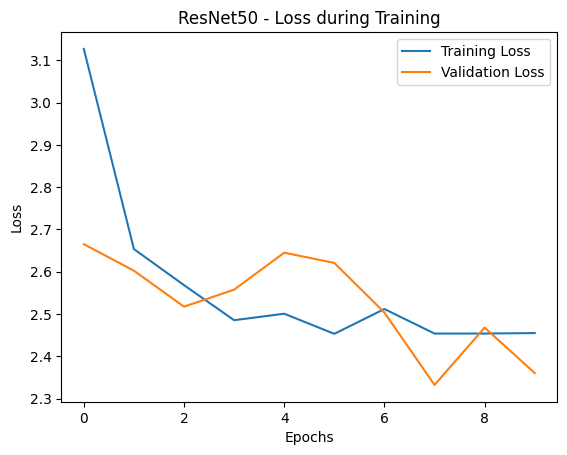

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input

# Carica ResNet50 pre-addestrato su ImageNet, escludendo la parte superiore (head)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Aggiungi il livello di pooling globale e la parte superiore del modello
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Usa il numero di classi del dataset

# Trasforma le etichette in formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_val, num_classes=10)

# Costruisci il modello
model = Model(inputs=base_model.input, outputs=x)

# Congela i pesi del modello pre-addestrato
for layer in base_model.layers:
    layer.trainable = False

# Compila il modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Pre-processa le immagini
X_train_resnet50 = preprocess_input(X_train)
X_val_resnet50 = preprocess_input(X_val)

# Addestra il modello
history_resnet50 = model.fit(X_train_resnet50, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_resnet50, y_val_one_hot))

# Salva il modello addestrato
model.save("resnet50_fingerprint_model.h5")

# Valuta il modello sui dati di validazione
score = model.evaluate(X_val_resnet50, y_val_one_hot, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

# Visualizza l'accuratezza del modello durante l'addestramento
plt.plot(history_resnet50.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 - Accuracy during Training')
plt.show()

# Visualizza la loss del modello durante l'addestramento
plt.plot(history_resnet50.history['loss'], label='Training Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet50 - Loss during Training')
plt.show()

**Grafico Accuracy**
Il grafico mostra l'evoluzione dell'accuratezza di un modello ResNet50 durante il processo di addestramento.
Sono presenti due linee:
- Accuracy di Training: Indica quanto accuratamente il modello classifica i dati già visti durante l'addestramento.
- Accuracy di Validation: Misura quanto bene il modello generalizza a nuovi dati che non ha mai visto prima, ovvero la sua capacità di fare previsioni accurate su dati non utilizzati durante l'addestramento.

Interpretazione dei Risultati
- Oscillazioni significative: Entrambe le linee mostrano oscillazioni significative durante l'addestramento, suggerendo una instabilità nel processo di apprendimento.
- Bassa accuratezza: Sia l'accuratezza di training che di validation sono relativamente basse, indicando che il modello sta faticando a imparare le caratteristiche distintive dei dati.
- Overfitting: Nonostante le oscillazioni, non si osserva una chiara divergenza tra le due linee, suggerendo che il problema principale non è l'overfitting (quando il modello memorizza i dati di training troppo bene e non riesce a generalizzare).
- Underfitting: È più probabile che il modello stia soffrendo di underfitting, ovvero non è abbastanza complesso per catturare le complessità dei dati.


**Grafico Loss**
Il grafico mostra come varia la perdita del modello ResNet50 durante il processo di addestramento. La perdita è una misura di quanto il modello sbaglia nelle sue previsioni: valori più bassi indicano un modello più accurato.
Ci sono due linee principali:
- Perdita di Training: Indica quanto il modello sbaglia sui dati che ha già visto durante l'addestramento.
- Perdita di Validation: Misura quanto il modello sbaglia su nuovi dati che non ha mai visto prima, ovvero la sua capacità di generalizzare.

Interpretazione dei Risultati
- Tendenza Decrescente: Entrambe le linee mostrano una tendenza generale alla diminuzione, il che è un buon segno, indicando che il modello sta imparando.
- Divergenza delle Curve: Dopo le prime epoche, si nota una certa divergenza tra le due curve. La perdita di training continua a diminuire costantemente, mentre quella di validation oscilla e sembra stabilizzarsi ad un valore più alto.
- Overfitting: Questa divergenza è un forte indicatore di overfitting. Il modello sta memorizzando i dettagli specifici dei dati di training, perdendo così la capacità di generalizzare a nuovi dati. In altre parole, il modello sta diventando troppo "specializzato" per i dati di training e non è più in grado di fare previsioni accurate su dati che non ha mai visto prima.


## Curva ROC e AUC

Questo codice calcola e visualizza le curve ROC per il modello di classificazione multiclasse, con il calcolo dell’area sotto la curva (AUC) per ciascuna classe:
1. Calcolo ROC e AUC per ogni classe: Per ciascuna delle 10 classi, calcola il tasso di falsi positivi (FPR) e il tasso di veri positivi (TPR), quindi determina l’area sotto la curva (AUC) per ogni classe.
2. Curva ROC micro-media: Calcola una curva ROC micro-media, che combina tutte le classi in un’unica curva per dare una visione complessiva delle prestazioni del modello.
3. Visualizzazione delle curve ROC: Traccia le curve ROC per ciascuna classe, aggiungendo anche la curva micro-media. La linea diagonale rappresenta un classificatore casuale (senza capacità discriminante).
4. Analisi delle prestazioni: Le curve ROC e le AUC forniscono una misura della capacità del modello di distinguere correttamente le classi. Un AUC più vicino a 1 indica buone prestazioni.

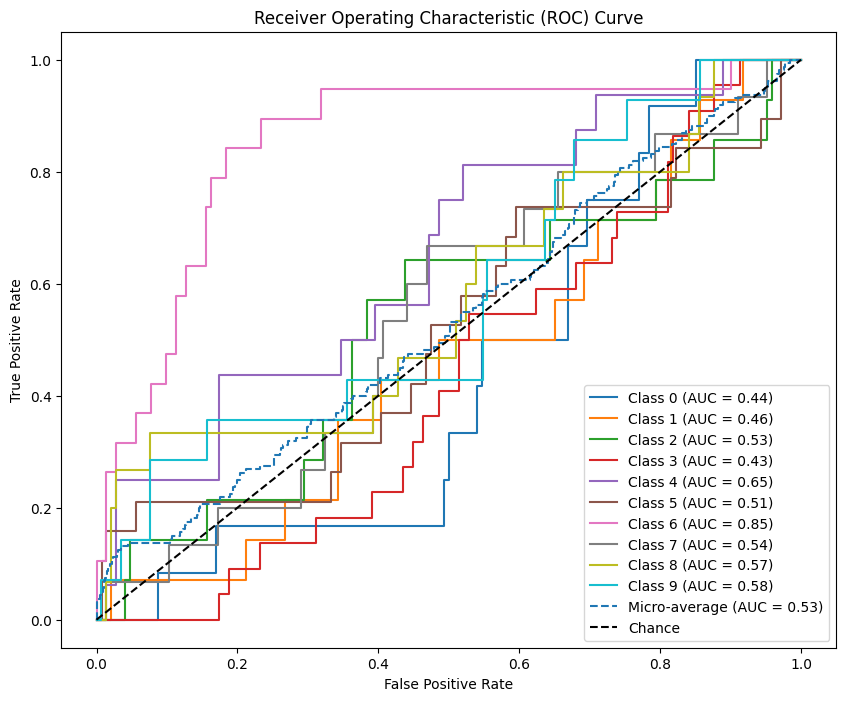

In [13]:
# Calcola la curva ROC e AUC per ogni classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):  # Per ciascuna classe
    fpr[i], tpr[i], _ = roc_curve(y_val_one_hot[:, i], y_val_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Curva ROC micro-media
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_one_hot.ravel(), y_val_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot della curva ROC per ciascuna classe
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Aggiungi la curva ROC micro-media
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.2f})", linestyle='--')

# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Curva ROC e AUC**
- Performance delle classi: Le classi con un'AUC più vicina a 1 stanno performando meglio. In questo caso, la Classe 6 ha l'AUC più alta (0.85), suggerendo che è la classe classificata meglio dal modello.
- Confronto tra le classi: Confrontando le diverse curve, si possono vedere le classi più difficili da classificare (quelle con AUC più basse). Ad esempio, la Classe 0 ha l'AUC più bassa (0.44), indicando che potrebbe essere più difficile da distinguere dalle altre classi.

## Confronto fra VGG16 e ResNet50

Questo codice confronta visivamente le prestazioni dei modelli VGG16 e ResNet50 durante l’addestramento:
1. Grafico dell’accuratezza: Traccia l’accuratezza di addestramento e di validazione per entrambi i modelli (VGG16 e ResNet50). Questo aiuta a confrontare come ciascun modello sta migliorando durante le epoche e a vedere se uno dei modelli sta sovrallenando o ha una migliore generalizzazione.
2. Grafico della perdita: Traccia la perdita di addestramento e di validazione per entrambi i modelli. La perdita indica quanto il modello si sta adattando ai dati, con valori più bassi che indicano un migliore adattamento.
3. Visualizzazione comparativa: Utilizzando due subplot affiancati, il codice fornisce un confronto chiaro tra l’accuratezza e la perdita dei due modelli, per facilitare l’analisi delle loro prestazioni relative.

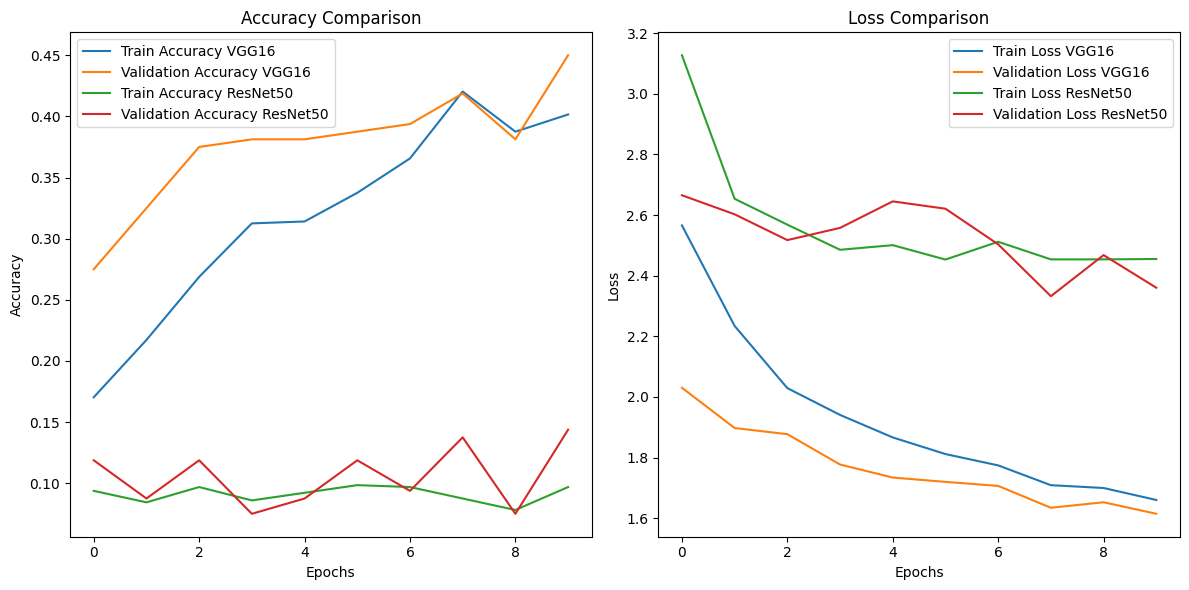

In [14]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.figure(figsize=(12, 6))

# Accuratezza per VGG16
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy VGG16')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy VGG16')
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy ResNet50')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy ResNet50')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot della perdita
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss VGG16')
plt.plot(history.history['val_loss'], label='Validation Loss VGG16')
plt.plot(history_resnet50.history['loss'], label='Train Loss ResNet50')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss ResNet50')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Grafico Accuracy**
- VGG16: Raggiunge un'accuratezza di training più alta e si stabilizza prima rispetto a ResNet50. Questo suggerisce che VGG16 impara le caratteristiche del dataset di training in modo più efficiente.
- ResNet50: L'accuratezza di training cresce più lentamente e mostra maggiore variabilità.

**Grafico Loss**
- VGG16: La perdita di training diminuisce rapidamente e si stabilizza a un valore inferiore rispetto a ResNet50.
- ResNet50: La perdita di training diminuisce più lentamente e la perdita di validation mostra una maggiore variabilità.

**Conclusioni**
- VGG16 sembra essere più adatto per questo specifico dataset: La sua capacità di raggiungere rapidamente un'alta accuratezza di training e una bassa perdita suggerisce che è in grado di apprendere le caratteristiche del dataset in modo più efficace.
- ResNet50 potrebbe soffrire di overfitting: La maggiore variabilità nell'accuratezza e nella perdita di validation suggerisce che ResNet50 potrebbe non essere il modello ideale per questo dataset e che stia memorizzando il rumore invece di generalizzare.
- Dataset: Le prestazioni di un modello dipendono fortemente dal dataset utilizzato. Un dataset più complesso potrebbe favorire ResNet50 grazie alla sua capacità di apprendere caratteristiche più profonde.
- Iperparametri: I valori degli iperparametri (learning rate, batch size, ecc.) possono influenzare significativamente i risultati.
- Implementazione: Differenze nell'implementazione del modello o del processo di addestramento possono portare a risultati diversi.
- Overfitting: Entrambi i modelli potrebbero soffrire di overfitting, anche se in misura diversa.

Sulla base dei grafici forniti, VGG16 sembra essere un modello più adatto per questo specifico dataset. Tuttavia, è importante considerare che le prestazioni di un modello dipendono da molti fattori e che i risultati possono variare a seconda del problema e del dataset utilizzato.

**Miglioramenti**
- Regolare gli iperparametri: Si potrebbe sperimentare con diversi valori di learning rate, batch size, ecc.
- Applicare tecniche di regularizzazione: Utilizzare dropout, L1/L2 regularization per prevenire l'overfitting, soprattutto per ResNet50.
- Aumentare la quantità di dati: Un dataset più grande può aiutare a migliorare la generalizzazione del modello.
- Utilizzare tecniche di data augmentation: Aumentare artificialmente la dimensione del dataset applicando trasformazioni ai dati.
- Provare altre architetture: Esistono molte altre architetture oltre a VGG16 e ResNet50. Si potrebbero testare modelli più recenti o ancora più specializzati per il lavoro.